## Filtering Exercise

In [6]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

### Load images

(-0.5, 299.5, 199.5, -0.5)

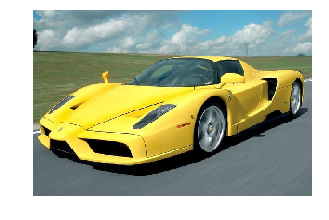

In [7]:
plt.rcParams["figure.figsize"] = [5, 5]

I = np.array(Image.open('4.jpg').convert('RGB').resize((300,200)))
plt.figure()
plt.imshow(I)
plt.axis('off')

### Different Types of Filters

In [8]:
'''design convolutional kernels and convolve I'''
edge_filter1 = np.array([[1, 0, -1],                        
            [0, 0, 0],
            [-1, 0, 1]])  

edge_filter2 = np.array([[0, 1, 0],                       
            [1, -4, 1],
            [0, 1, 0]])  

edge_filter3 = np.array([[-1, -1, -1],                        
            [-1, 8, -1],
            [-1, -1, -1]]) 

sharpen_filter = np.array([[0, -1, 0],                       
            [-1, 5, -1],
            [0, -1, 0]])  

scale_factor = 1/16
gaussian_blur_filter = scale_factor*np.array([[1, 2, 1],                        
                [2, 4, 2],
                [1, 2, 1]])

# TODO: Design your own filter
my_filter = np.array([[0, -1, 0],                       
                    [-1, 4, -1],
                    [0, -1, 0]])    

### Task 1: Filtering on Grayscale Image

Text(0.5,1,'image after fitering')

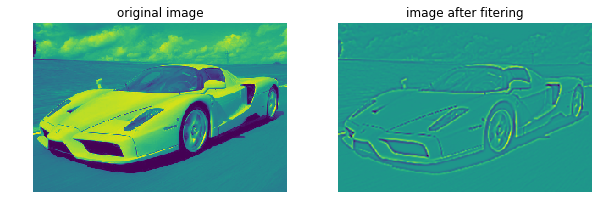

In [9]:
plt.rcParams["figure.figsize"] = [10, 10]
'''RGB image to grayscale image'''
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gray = rgb2gray(I)   
plt.subplot(1, 2, 1)
plt.imshow(gray)
plt.axis('off')
plt.title('original image')

# TODO: You can change the filter here
Gray_Filter = my_filter

# filter on grayscale image
gray_GBlur = cv2.GaussianBlur(gray, (15,15), 1)

gray_gradient = cv2.filter2D(gray_GBlur,-1,Gray_Filter)
plt.subplot(1, 2, 2)
plt.imshow(gray_gradient)
plt.axis('off')
plt.title('image after fitering')

### Task 2: Filtering on RGB Channel Separately

(-0.5, 299.5, 199.5, -0.5)

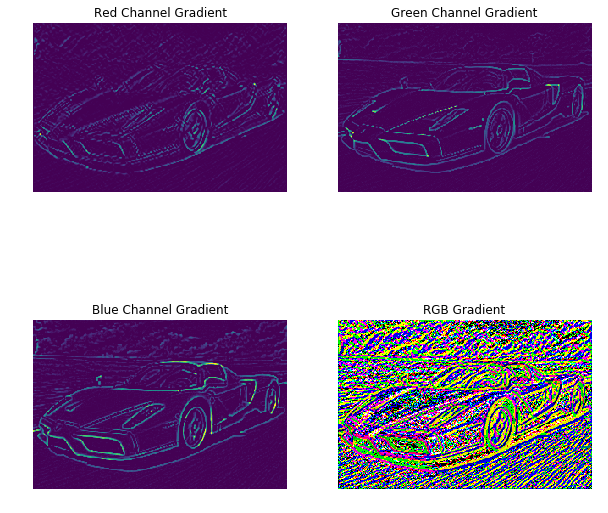

In [10]:
plt.rcParams["figure.figsize"] = [10, 10]

blue = I[:,:,0]
green = I[:,:,1]
red = I[:,:,2]

# TODO: You can change the filters for RGB channels here
RedKernel = edge_filter1
GreenKernel = edge_filter2
BlueKernel = edge_filter3

# filter on red channel
red_GBlur = cv2.filter2D(red,-1,gaussian_blur_filter)
red_gradient = cv2.filter2D(red_GBlur,-1,RedKernel)

# filter on green channel
green_GBlur = cv2.filter2D(green,-1,gaussian_blur_filter)
green_gradient = cv2.filter2D(green_GBlur,-1,GreenKernel)

# filter on blue channel
blue_GBlur = cv2.filter2D(blue,-1,gaussian_blur_filter)
blue_gradient = cv2.filter2D(blue_GBlur,-1,BlueKernel)

plt.subplot(2,2,1)
plt.imshow(red_gradient)
plt.title('Red Channel Gradient')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(green_gradient)
plt.title('Green Channel Gradient')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(blue_gradient)
plt.title('Blue Channel Gradient')
plt.axis('off')

RGB_gradient = np.zeros((blue_gradient.shape[0], blue_gradient.shape[1],3))
RGB_gradient[:,:,0] = red_gradient
RGB_gradient[:,:,1] = green_gradient
RGB_gradient[:,:,2] = blue_gradient
plt.subplot(2,2,4)
plt.imshow(RGB_gradient)
plt.title('RGB Gradient')
plt.axis('off')